In [1]:
from collect_json import data_pipeline
import numpy as np
import pandas as pd
from scipy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.cluster import dbscan

%matplotlib inline

In [2]:
folder = '../data/'
feature_matrix = data_pipeline(folder, 'combine', set=True)

In [3]:
game_names = data_pipeline(folder, 'name')

In [4]:
#SVD breaks when it tries to calc U and V
U, S, Vt = svd(feature_matrix, full_matrices=False)

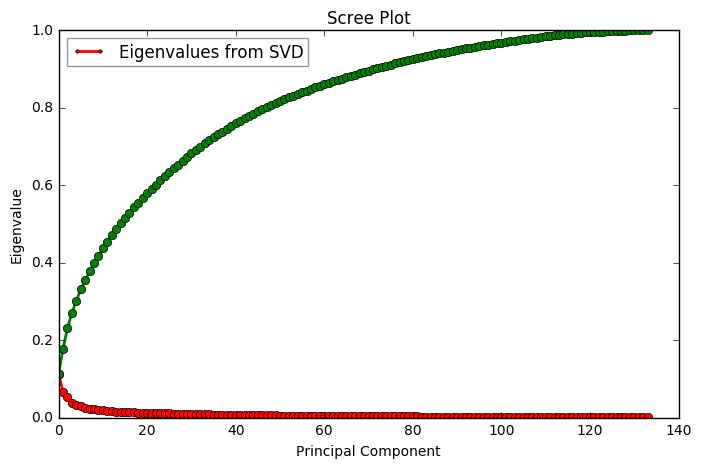

In [5]:
eigvals = S**2 / np.cumsum(S**2)[-1]

fig = plt.figure(figsize=(8,5))
plt.plot(eigvals, 'ro-', linewidth=2)
plt.plot(np.cumsum(eigvals), 'go-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, 
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)

In [10]:
for i, v in np.ndenumerate(np.cumsum(eigvals)):
    print i, v

(0,) 0.111904954375
(1,) 0.177962968627
(2,) 0.231223453186
(3,) 0.269555132454
(4,) 0.301653028878
(5,) 0.330762927
(6,) 0.354961259303
(7,) 0.377837059729
(8,) 0.39878380104
(9,) 0.417968830729
(10,) 0.436178330904
(11,) 0.4541922956
(12,) 0.471269647188
(13,) 0.486252566164
(14,) 0.50095288666
(15,) 0.515068694354
(16,) 0.528587034392
(17,) 0.541953347382
(18,) 0.554495336806
(19,) 0.566867708544
(20,) 0.578412768014
(21,) 0.589805012095
(22,) 0.600984119411
(23,) 0.611857950741
(24,) 0.622425706618
(25,) 0.632848744148
(26,) 0.643022335579
(27,) 0.652866566794
(28,) 0.66259740589
(29,) 0.672042504702
(30,) 0.681336672257
(31,) 0.690180805685
(32,) 0.698974901508
(33,) 0.707352400231
(34,) 0.715283723471
(35,) 0.723001610396
(36,) 0.730530241869
(37,) 0.737833454674
(38,) 0.745047458369
(39,) 0.752033033589
(40,) 0.75879246309
(41,) 0.765382318309
(42,) 0.771748149074
(43,) 0.777958451326
(44,) 0.784068663099
(45,) 0.789729850469
(46,) 0.795286876178
(47,) 0.80068513708
(48,) 0.8059

In [11]:
print U.shape
print Vt.shape

(87726, 134)
(134, 134)


In [30]:
#feature_matrix = feature_matrix.set_index('ids')
A = feature_matrix.iloc[39]
B = feature_matrix.iloc[123]


In [42]:
jaccard(A, A)

0.0

In [41]:
for i in range(10):
    print feature_matrix.iloc(i)

In [39]:
random.sample(feature_matrix.index, 5)

[145171, 154741, 100172, 142632, 41569]

In [46]:
popular_features = feature_matrix.sum(axis=0).sort_values()

In [47]:
popular_features

features
Crayon Rail System               80.0
Korean War                       90.0
American Indian Wars            135.0
Pike and Shot                   136.0
Post-Napoleonic                 149.0
Arabian                         191.0
Vietnam War                     194.0
Area-Impulse                    209.0
Game System                     228.0
Fan Expansion                   231.0
American Revolutionary War      232.0
Time Track                      232.0
Singing                         244.0
Medical                         247.0
Civil War                       302.0
Age of Reason                   317.0
Mafia                           359.0
Line Drawing                    367.0
Prehistoric                     431.0
Rock-Paper-Scissors             530.0
Maze                            544.0
Renaissance                     548.0
Spies/Secret Agents             549.0
Music                           594.0
Farming                         630.0
American Civil War              630.0
Are

In [49]:
model = NMF(n_components=20, init='random', random_state=0)

In [50]:
W = model.fit_transform(feature_matrix)

In [53]:
W.shape

(87726, 20)

In [54]:
H = model.components_

In [55]:
H.shape

(20, 134)

In [56]:
model.reconstruction_err_

413.41731012762887

In [64]:
#nmf_results = []
for k in range(41, 81):
    model = NMF(n_components=k, init='random', random_state=0)
    model.fit(feature_matrix)
    nmf_results.append((k, model.reconstruction_err_))

In [65]:
nmf_results

[(5, 514.6840699619594),
 (6, 504.32280507965277),
 (7, 497.15229551479763),
 (8, 488.6300990102074),
 (9, 480.54950610256805),
 (10, 473.95962265404717),
 (11, 464.4064354333873),
 (12, 458.46471826605864),
 (13, 451.6506396839336),
 (14, 443.60596621251375),
 (15, 438.1157377461024),
 (16, 434.4362153949713),
 (17, 428.1325964129097),
 (18, 423.7043447850639),
 (19, 418.8542179087846),
 (20, 413.41731012762887),
 (21, 408.7221002288614),
 (22, 399.6601986199924),
 (23, 394.0663639968615),
 (24, 387.2138535840467),
 (25, 381.6475523610548),
 (26, 376.030462494263),
 (27, 371.29754746543045),
 (28, 366.45371423689176),
 (29, 361.16812551721546),
 (30, 356.2301366877353),
 (31, 351.4533361110271),
 (32, 347.6212651465153),
 (33, 341.87216395748425),
 (34, 338.4460762586582),
 (35, 335.0695927172575),
 (36, 330.394860338879),
 (37, 325.5903102914845),
 (38, 322.0909840987224),
 (39, 317.26369327818827),
 (40, 312.5172354518062),
 (41, 309.16251182344627),
 (42, 302.8367266704611),
 (43, 

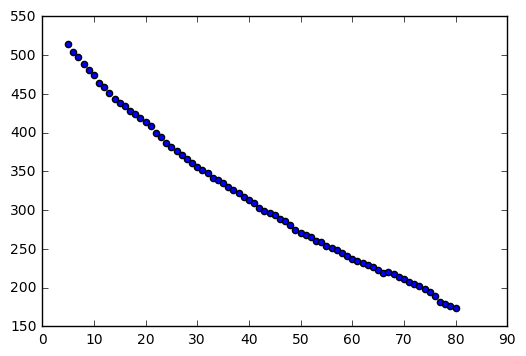

In [78]:
plt.scatter(*zip(*nmf_results))

In [82]:
games = model.transform(feature_matrix)

In [93]:
topic1 = zip(model.components_[0], feature_matrix.columns.values)

In [100]:
topic1_sorted = sorted(topic1, key=lambda x: x[0])


In [101]:
topic1_sorted[-10:]

[(0.00028219359880732894, u'Commodity Speculation'),
 (0.0003973245697034732, u'Mafia'),
 (0.00048242848687390499, u'Time Track'),
 (0.00064445713443864378, u'Action / Movement Programming'),
 (0.0010412567854326336, u'Mythology'),
 (0.0012050267313210769, u'Spies/Secret Agents'),
 (0.0015116052243939926, u'Book'),
 (0.0021580923119475753, u'Civilization'),
 (0.0025698930153919032, u'Video Game Theme'),
 (0.22765182265440556, u'Variable Player Powers')]

In [106]:
np.argmax(games[:,0])

6095

In [110]:
from sklearn.manifold import TSNE

In [111]:
tmodel = TSNE()

In [ ]:
tsne_x = tmodel.fit_transform(feature_matrix)